# Import libraries

In [2]:
import tensorflow as tf
from keras.layers import Dense
from keras import Sequential
import numpy as np
import matplotlib.pyplot as plt

2023-05-14 12:40:52.764629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Загрузка и обработка данных

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
X_train, X_test = X_train.reshape(len(X_train), 784) / 255, X_test.reshape(len(X_test), 784) / 255

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:

class_count = 10

# Базовая модель MLP

In [9]:
model = Sequential()
model.add(Dense(300 * 300, activation='relu', input_shape=(300 * 300, ))) # вход и скрытный слой
model.add(Dense(25, activation='softmax')) # выходной слой
model.summary()

2023-05-14 12:41:51.472433: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 32400000000 exceeds 10% of free system memory.
2023-05-14 12:41:55.584351: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 32400000000 exceeds 10% of free system memory.
2023-05-14 12:41:58.541413: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 32400000000 exceeds 10% of free system memory.


KeyboardInterrupt: 

Компиляция модели

In [7]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test), workers=-1)

Epoch 1/30
938/938 [==============================] - 3s 3ms/step - loss: 1.1491 - accuracy: 0.6823 - val_loss: 0.5718 - val_accuracy: 0.8590
Epoch 2/30
938/938 [==============================] - 3s 3ms/step - loss: 0.4972 - accuracy: 0.8690 - val_loss: 0.4088 - val_accuracy: 0.8925
Epoch 3/30
938/938 [==============================] - 2s 3ms/step - loss: 0.4003 - accuracy: 0.8890 - val_loss: 0.3548 - val_accuracy: 0.9010
Epoch 4/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3595 - accuracy: 0.8989 - val_loss: 0.3287 - val_accuracy: 0.9081
Epoch 5/30
938/938 [==============================] - 2s 3ms/step - loss: 0.3358 - accuracy: 0.9051 - val_loss: 0.3116 - val_accuracy: 0.9130
Epoch 6/30
938/938 [==============================] - 2s 3ms/step - loss: 0.3197 - accuracy: 0.9090 - val_loss: 0.2998 - val_accuracy: 0.9139
Epoch 7/30
938/938 [==============================] - 2s 2ms/step - loss: 0.3078 - accuracy: 0.9126 - val_loss: 0.2899 - val_accuracy: 0.9177
Epoch 

vizualize

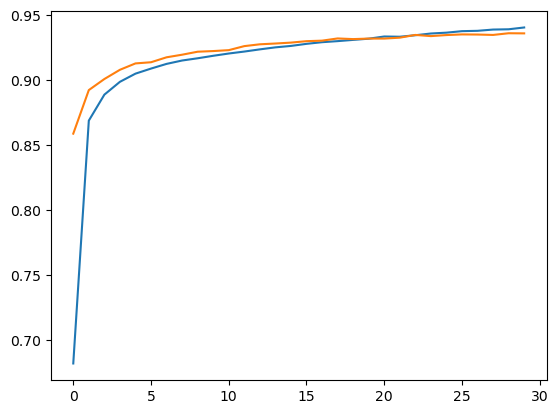

In [9]:
# 1
plt.plot(np.arange(30), history.history['accuracy'], label='train')
plt.plot(np.arange(30), history.history['val_accuracy'], label='test')

In [10]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [11]:
np.round(y_pred[0], 3)

array([0.   , 0.   , 0.003, 0.004, 0.   , 0.   , 0.   , 0.992, 0.   ,
       0.001], dtype=float32)

In [12]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Save weights

In [13]:
model.save_weights('my_model')

Load model

In [14]:
model.load_weights('my_model')

Vizualize

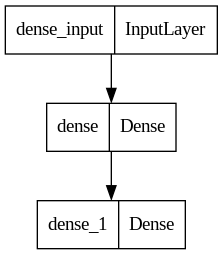

In [15]:
tf.keras.utils.plot_model(model)

# Fit

In [16]:
model.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_test, y_test), workers=-1)

938/938 [==============================] - 3s 3ms/step - loss: 0.2105 - accuracy: 0.9412 - val_loss: 0.2126 - val_accuracy: 0.9369


In [17]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(784, ))) # вход и скрытный слой
model.add(Dense(100, activation='relu')) # вход и скрытный слой
model.add(Dense(class_count, activation='softmax')) # выходной слой
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), workers=-1)

Epoch 1/50
938/938 [==============================] - 5s 5ms/step - loss: 0.9055 - accuracy: 0.7697 - val_loss: 0.4110 - val_accuracy: 0.8888
Epoch 2/50
938/938 [==============================] - 4s 5ms/step - loss: 0.3708 - accuracy: 0.8960 - val_loss: 0.3137 - val_accuracy: 0.9125
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3111 - accuracy: 0.9107 - val_loss: 0.2755 - val_accuracy: 0.9235
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2778 - accuracy: 0.9206 - val_loss: 0.2528 - val_accuracy: 0.9291
Epoch 5/50
938/938 [==============================] - 4s 5ms/step - loss: 0.2546 - accuracy: 0.9267 - val_loss: 0.2326 - val_accuracy: 0.9342
Epoch 6/50
938/938 [==============================] - 4s 5ms/step - loss: 0.2357 - accuracy: 0.9327 - val_loss: 0.2231 - val_accuracy: 0.9357
Epoch 7/50
938/938 [==============================] - 4s 5ms/step - loss: 0.2197 - accuracy: 0.9377 - val_loss: 0.2056 - val_accuracy: 0.9405
Epoch 

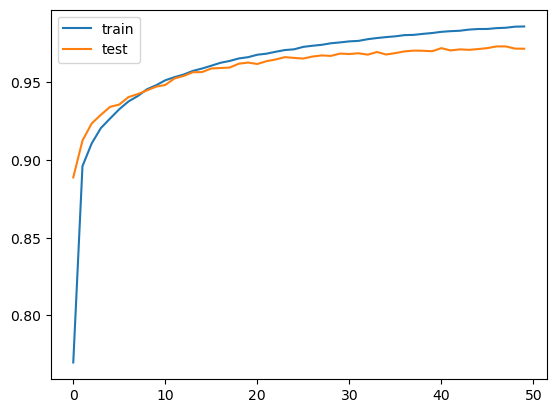

In [20]:
# 1
plt.plot(np.arange(50), history.history['accuracy'], label='train')
plt.plot(np.arange(50), history.history['val_accuracy'], label='test')
plt.legend()

способы борьбы с переобучением

- регуляризация
- Dropout

In [ ]:
# kernel_regularizer=tf.keras.regularizers.L1(0.01), activity_regularizer=tf.keras.regularizers.L2(0.01)

In [7]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(784, )))
model.add(Dropout(0.15))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(class_count, activation='softmax'))

2023-04-30 12:58:24.971419: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-30 12:58:25.040726: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-30 12:58:25.041234: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-30 12:58:25.041584: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1976] Ignoring visible gpu device (device: 0, name: Quadro K5000, pci bus id: 0000:05:00.0, compute capability: 3.0) with Cuda compute capability 3.0. The minimum required Cuda capability is 3.5.
2023-04-30 12:58:25.042411

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), workers=-1)

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.0776 - val_accuracy: 0.9803
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0269 - accuracy: 0.9908 - val_loss: 0.0841 - val_accuracy: 0.9782
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 0.0764 - val_accuracy: 0.9808
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0793 - val_accuracy: 0.9816
Epoch 5/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0223 - accuracy: 0.9924 - val_loss: 0.0829 - val_accuracy: 0.9794
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0807 - val_accuracy: 0.9820
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0202 - accuracy: 0.9932 - val_loss: 0.0792 - val_accuracy: 0.9813
Epoch 

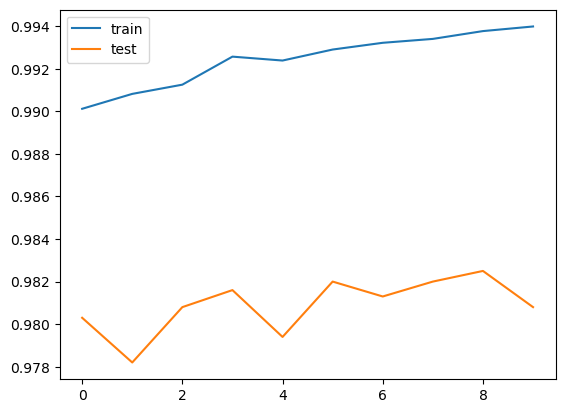

In [10]:
# 1
plt.plot(np.arange(10), history.history['accuracy'], label='train')
plt.plot(np.arange(10), history.history['val_accuracy'], label='test')
plt.legend()